Занятие 2. Предварительный анализ данных. Визуализация данных.
=======

Полезные ссылки:
* https://pandas.pydata.org/pandas-docs/stable/visualization.html
* http://matplotlib.org/gallery.html

Швейцарские банкноты
-----
Будем работать с данными из файла ```swiss_bank_notes.csv```, в которых находится информация о поддельных и настоящих купюрах, а именно -- размерах банкнот. Хотим попробовать "на глаз", без применения методов машинного обучения попробовать отличить фальшивые купюры от настоящих.

Начнём с чтения данных. Метод ```pandas.read_csv``` читает данные из текстового файла с разделителем (т.н. csv-файлы, comma-separated values) в объект DataFrame.

Полезные параметры:
* ```sep``` -- задаёт символ-разделитель полей в файле (по умолчанию разделитель запятая);
* ```names``` -- список названий колонок, если он не задан в файле;
* ```index_col``` -- номер колонки с индексом.
* ```decimal``` -- символ-разделитель для знаков после запятой.

Пара слов об аргументах функций.
Аргументы бывают именованные (задано имя аргумента) или позиционные (имя аргумента не задано).
Здесь ```swiss_bank_notes.csv``` -- позиционный аргумент, имя файла. ```index_col=0``` -- именованный аргумент. При вызове функции именованные аргументы обязаны следовать после позиционных.

Кроме этого, pandas поддерживает чтение большинства распространённых форматов данных, в частности Excel.

In [1]:
import pandas as pd
df = pd.read_csv('swiss_bank_notes.csv', index_col=0)

Убедимся, что с самими данными всё хорошо, да и вообще данные прочитались нормально. Используем метод ```DataFrame.head```, который выводит первые n строк таблицы (по умолчанию 5).

In [2]:
df.head()

,Status,Length,Left,Right,Bottom,Top,Diagonal
1,genuine,214.8,131.0,131.1,9.0,9.7,141.0
2,genuine,214.6,129.7,129.7,8.1,9.5,141.7
3,genuine,214.8,129.7,129.7,8.7,9.6,142.2
4,genuine,214.8,129.7,129.6,7.5,10.4,142.0
5,genuine,215.0,129.6,129.7,10.4,7.7,141.8


Также посмотрим, какова размерность данных. Для этого есть атрибут ```DataFrame.shape```. Информацию о количестве строк требуется знать чаще. Для этого можно применить уже знакомую функцию ```len```.

In [3]:
print df.shape
print len(df)

(200, 7)
200


Посмотрим на типы данных.

In [4]:
df.dtypes

Status       object
Length      float64
Left        float64
Right       float64
Bottom      float64
Top         float64
Diagonal    float64
dtype: object

После того, как убедились, что данные считались корректно, хочется сделать их быстрый обзор. Для этого есть метод ```DataFrame.describe```, который для всех численных колонок выводит:
* count -- число значений колонок без NA-значений (NA -- not available, т.е. без пропусков),
* mean -- среднее значение колонки,
* std -- стандартное отклонение,
* min, max -- наибольшее и наименьшее значение,
* 25%, 50%, 75% -- перцентили.

In [5]:
df.describe()

,Length,Left,Right,Bottom,Top,Diagonal
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,214.896000,130.121500,129.956500,9.417500,10.650500,140.483500
std,0.376554,0.361026,0.404072,1.444603,0.802947,1.152266
min,213.800000,129.000000,129.000000,7.200000,7.700000,137.800000
25%,214.600000,129.900000,129.700000,8.200000,10.100000,139.500000
50%,214.900000,130.200000,130.000000,9.100000,10.600000,140.450000
75%,215.100000,130.400000,130.225000,10.600000,11.200000,141.500000
max,216.300000,131.000000,131.100000,12.700000,12.300000,142.400000


Для строковой колонки ```Status``` можно вывести распределение статусов с помощью метода ```Series.value_counts```.

In [6]:
df['Status'].value_counts()

counterfeit    100
genuine        100
Name: Status, dtype: int64

Перцентили -- хорошо, но они дают не полную картину о распределении данных. Построим гистограммы для каждого измерения с помощью метода ```Series.hist```. Для этого нужно предварительно импортировать библиотеки ```matplotlib``` и ```matplotlib.pyplot```.

In [4]:
import matplotlib
import matplotlib.pyplot as plt

# выбор темы картинок на мой вкус. Необязательная строчка.
matplotlib.style.use('ggplot')
# Эта строчка нужна для того, чтобы картинки отображались в ячейках
%matplotlib inline

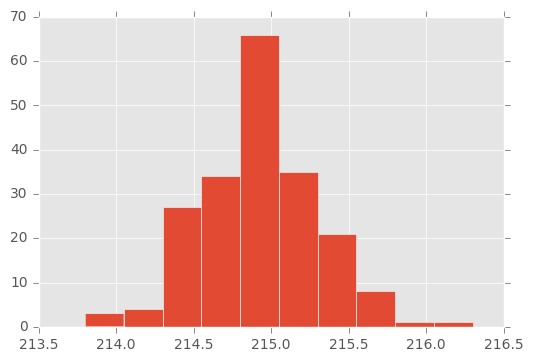

In [8]:
# Наконец, строим обещанную гистограмму для колонки Length.
df['Length'].hist();

По оси y находится количество строчек, у которых ```Length``` попала в данный столбик. Это не всегда удобно, и хочется смотреть на долю столбика от всех имеющихся данных. Специальной функции для этого нет, так что приходится использовать такой хак. Для каждой строчки нужно задать вес, равный числу, обратному длине рассматриваемого вектора.

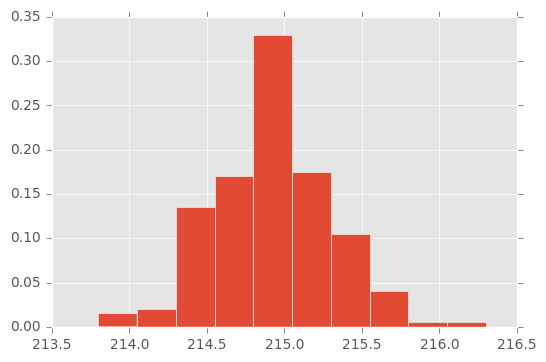

In [9]:
# Задаём список из 200 элементов, каждый из которых равен 1/200.
w = [1. / len(df)]*len(df)
# Передаём этот список функции hist как значение аргумента weights.
df['Length'].hist(weights=w);

Ещё данная гистограмма не устраивает нас тем, что она визуализирует смешанные данные по обоим классам ```counterfeit``` и ```genuine```. Хотелось бы, чтобы на гистограмме было видно разницу в распределении по этим классам.

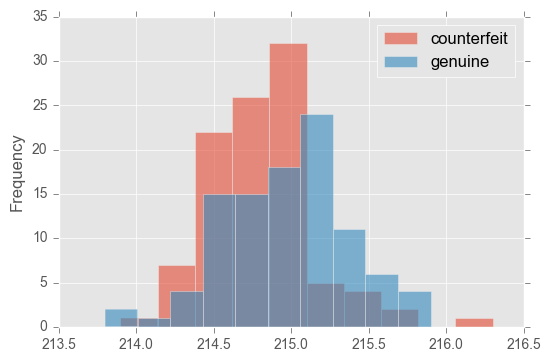

In [17]:
# По идее, вызов должен быть такой: df.groupby('Status')['Length'].hist(alpha=0.6)
# Но из-за бага https://github.com/pandas-dev/pandas/issues/10756
# приходится делать дополнительный вызов plot
df.groupby('Status')['Length'].plot.hist(alpha=0.6)
# Добавляем легенду
plt.legend();

Картинка красивая, но нисколько не отвечает на главный вопрос. Разницы в распределении между фальшивыми и настоящими купюрами практически нет. Но это мы построили распределения только одного фактора. Можно построить аналогичным образом гистограммы и для остальных факторов. Но если колонок не очень много (а у нас их действительно не много), можно построить такую картинку, после которой всё станет ясно со всеми распределениями сразу.

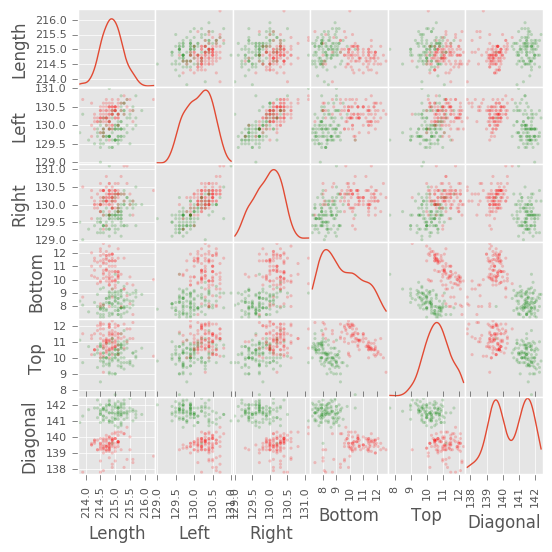

In [9]:
from pandas.plotting import scatter_matrix
colors = {'genuine': 'green', 'counterfeit': 'red'}
scatter_matrix(df,
               # размер картинки
               figsize=(6, 6),
               # плотность вместо гистограммы на диагонали
               diagonal='kde',
               # цвета классов
               c=df['Status'].replace(colors),
               # степень прозрачности точек
               alpha=0.2,
              );

Теперь ясно, что в распределении диагоналей купюр наблюдается очевидное смешение двух нормальных распределений. Теперь, построим гистограммы этого фактора для двух классов купюр, и дело прояснится.

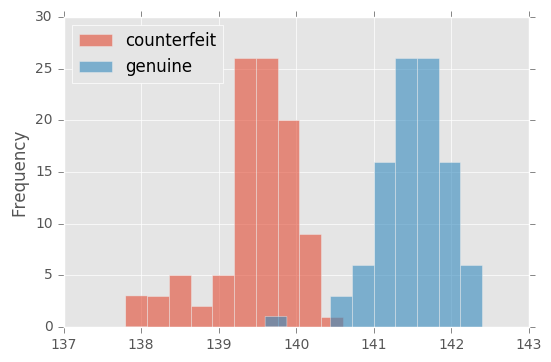

In [12]:
df.groupby('Status')['Diagonal'].plot.hist(alpha=0.6)
plt.legend(loc='upper left')

Можно построить отдельные диаграммы рассеивания, например, для пары признаков ```Top``` и ```Bottom```.

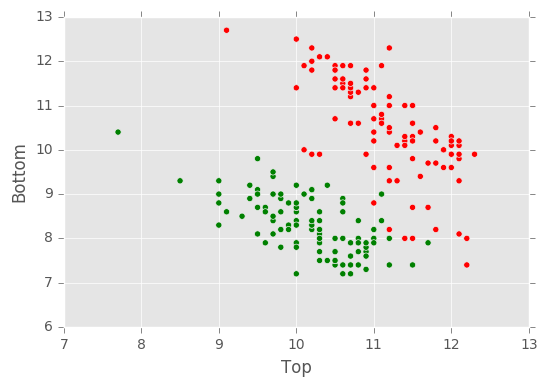

In [8]:
df.plot.scatter(x='Top', y='Bottom', c=df['Status'].replace(colors))

Титаник
------

In [14]:
df = pd.read_csv('titanic.csv')
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [3]:
df.dtypes

Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

In [8]:
df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887,887,887.000000,887.000000,887.000000,887.00000
unique,NaN,NaN,887,2,NaN,NaN,NaN,NaN
top,NaN,NaN,Mr. Owen Harris Braund,male,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,573,NaN,NaN,NaN,NaN
mean,0.385569,2.305524,NaN,NaN,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,NaN,NaN,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,NaN,NaN,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,31.13750


In [16]:
for column in ['Survived', 'Pclass', 'Sex']:
     df[column].value_counts(normalize=True)

In [15]:
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


Хотим представить ту же информацию, но в картинках для отчёта.

In [21]:
import matplotlib.pyplot as plt
# Нужно, чтобы подписи к картинкам отображались корректно по-русски
matplotlib.rc('font', family='Arial')

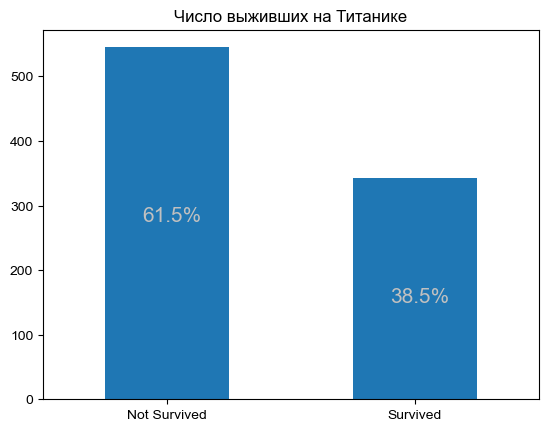

In [22]:
# Строим картинку
df['Survived'].value_counts().plot(kind='bar')
# Добавляем подпись
plt.title(u'Число выживших на Титанике')
plt.xticks([0, 1], ['Not Survived', 'Survived'], rotation=None)
plt.text(-0.1, 275, '61.5%', fontsize=15, color='silver')
plt.text(0.9, 150, '38.5%', fontsize=15, color='silver');

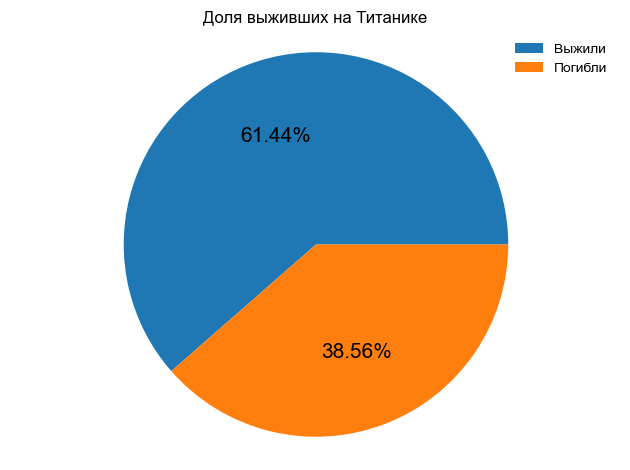

In [23]:
fig, ax = plt.subplots(1)
df['Survived'].value_counts().plot(kind='pie', labels=['', ''],
                                   ax=ax, autopct='%.2f%%', fontsize=15)
ax.set_title(u'Доля выживших на Титанике')
ax.axis('equal')
ax.legend(labels=[u'Выжили', u'Погибли'], framealpha=0)
ax.set_ylabel('')
plt.tight_layout()

**Boxplot (ящик с усами)**

Гистограммы информативны, но если нужно вывести много гистограмм на одной картинке, то всё смешается. В этом случае целесообразно использовать boxplot.

Text(0.5, 1.0, 'Распределение возраста')

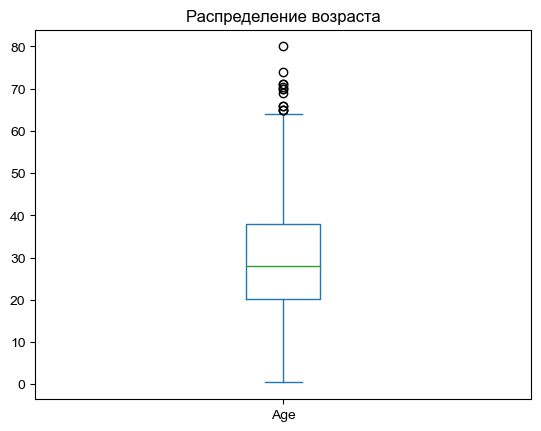

In [26]:
df['Age'].plot(kind='box')
plt.title(u'Распределение возраста')

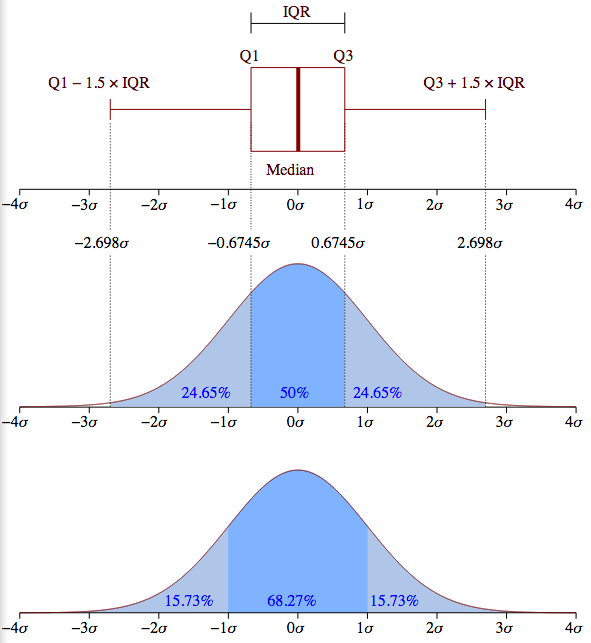

In [27]:
from IPython.display import Image
Image('boxplot_explanation.png')

И теперь пример с группировкий по классу пассажира.

Text(0.5, 0.98, '')

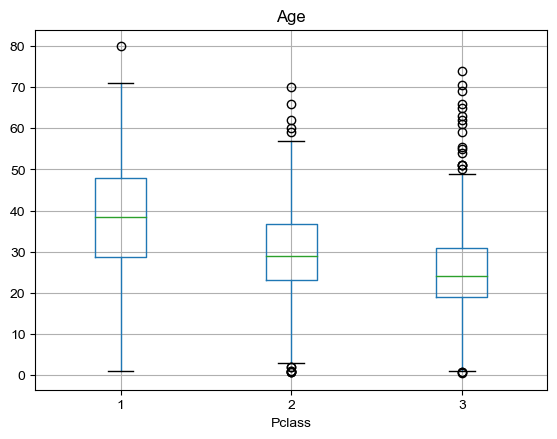

In [28]:
ax = df.boxplot(column='Age', by='Pclass')
# Хак для того, чтобы исправить наезжающие заголовки графика
ax.get_figure().suptitle('')

**Логарифмическое распределение**

In [29]:
df = pd.read_csv('town_1959_2.csv', encoding='cp1251', index_col=u'номер')
df.head()

,город,население
номер,,
1,Москва,5046.0
2,Санкт-Петербург,3003.0
3,Нижний_Новгород,941.0
4,Новосибирск,885.0
5,Самара,806.0


Если мы построим распределение для населения в чистом виде, то ничего не будет понятно: слишком много городов с небольшим населением (меньше 500000) и слишком мало городов с большим населением.

<AxesSubplot:>

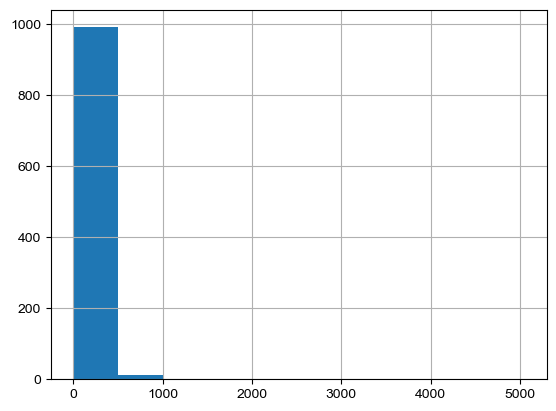

In [30]:
df[u'население'].hist()

Можно было бы поиграться с размером бина, но есть метод проще. Построим гистограмму не для самого населения, а для логарифма от этого числа.

<AxesSubplot:>

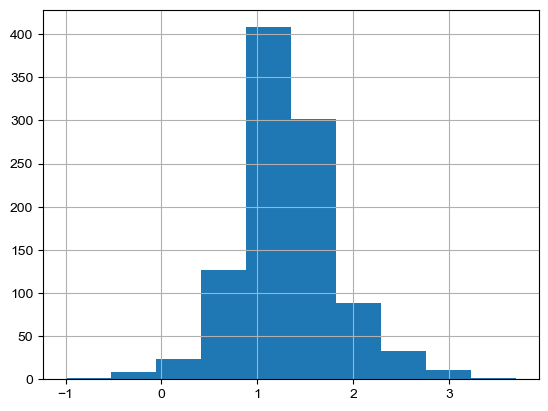

In [31]:
import numpy as np
x = np.log10(df[u'население'])
pd.Series(x).hist()

Нужно только помнить, что по иксу у нас показатели степени 10. То есть в нашей выборке примерно 120 городов с населением от 3000 до 8000, 400 городов с населением от 8000 до 20000 и т.д.